Adult Dataset

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
#!unzip adult.zip

In [140]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv("adult.data", header = None, names = col_names)
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [141]:
#first analysis: target variable is the income
print((set(df["income"])))

{' >50K', ' <=50K'}


In [142]:
#income == 1 if income >= 50K , income == = if income < 50K
def income_map(income):
    if isinstance(income, str):  # Controlla se il valore è una stringa
        income = income.strip()  # Rimuove eventuali spazi bianchi prima e dopo il valore
        if income == ">50K":
            return 1
    return 0

df["income"] = df["income"].map(income_map)


In [143]:
print((set(df["income"])))

{0, 1}


In [144]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [145]:
#check if the dataset is balanced
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [146]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [147]:
#check for duplicate rows
duplicates = df.duplicated(keep = False)
print(f"duplicate rows: {duplicates.sum()}")

duplicate rows: 47


In [148]:
#remove
df.drop_duplicates(inplace = True)
duplicates = df.duplicated(keep = False)
print(f"duplicate rows: {duplicates.sum()}")

duplicate rows: 0


In [149]:
#split
df_train, df_test = train_test_split(df, test_size = 0.2, shuffle = True, random_state=42, stratify = df["income"])

In [150]:
#null values in train
print("Null Train")
print(df_train.isna().sum())

Null Train
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [151]:
#null values in test
print("Null Test")
print(df_test.isna().sum())

Null Test
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Let's see what values ​​each column contains, to understand how and whether to discretize, normalize or encode

In [152]:
for column in df.columns:
    unique_values = set(df[column])
    print(f"values in column '{column}': {unique_values}")


values in column 'age': {17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90}
values in column 'workclass': {' Private', ' Self-emp-inc', ' Local-gov', ' ?', ' Self-emp-not-inc', ' Federal-gov', ' Without-pay', ' Never-worked', ' State-gov'}
values in column 'fnlwgt': {262153, 262158, 131088, 131091, 393248, 131117, 393264, 262196, 262208, 262233, 262241, 262244, 262245, 131178, 131180, 262280, 393354, 393357, 262285, 393360, 131224, 131230, 393376, 131239, 131258, 262345, 131275, 262352, 131288, 131298, 131302, 131309, 131310, 262402, 393480, 262409, 262425, 262439, 262446, 131379, 262478, 131414, 131417, 131425, 131435, 262511, 262515, 131459, 131461, 131463, 131473, 262552, 262570, 131519, 262601, 393673, 131534, 262617, 131552, 131568, 393712, 262

AGE , maybe better do nothing

In [153]:
print((set(df_train["age"])))

{17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90}


WORKCLASS

In [154]:
print((set(df["workclass"])))


{' Private', ' Self-emp-inc', ' Local-gov', ' ?', ' Self-emp-not-inc', ' Federal-gov', ' Without-pay', ' Never-worked', ' State-gov'}


In [155]:
# Rename "?" con "Unknown" in "workclass"
df_train['workclass'] = df_train['workclass'].replace(' ?', ' Unknown')
df_test['workclass'] = df_test['workclass'].replace(' ?', ' Unknown')

In [156]:
# Combine "Federal-gov", "State-gov" e "Local-gov" e rename in "Government"
df_train.loc[df_train["workclass"].isin([" Federal-gov", " State-gov", " Local-gov"]), "workclass"] = " Government"
df_test.loc[df_test["workclass"].isin([" Federal-gov", " State-gov", " Local-gov"]), "workclass"] = " Government"

# Combine "Self-emp-inc", "Self-emp-not-inc" e rename in "Self-emp"
df_train.loc[df_train["workclass"].isin([" Self-emp-inc", " Self-emp-not-inc"]), "workclass"] = " Self-emp"
df_test.loc[df_test["workclass"].isin([" Self-emp-inc", " Self-emp-not-inc"]), "workclass"] = " Self-emp"

In [157]:
print((set(df_train["workclass"])))

{' Private', ' Unknown', ' Self-emp', ' Government', ' Without-pay', ' Never-worked'}


FNLWGH rescale

In [158]:
from sklearn.preprocessing import MinMaxScaler
minmax_s = MinMaxScaler()
minmax_s.fit(df_train[['fnlwgt']])
df_train['fnlwgt'] = minmax_s.transform(df_train[['fnlwgt']])
df_test['fnlwgt'] = minmax_s.transform(df_test[['fnlwgt']])

In [159]:
print("Train")
print(df_train.fnlwgt.min())
print(df_train.fnlwgt.max())
print()
print("Test, ok if not between[0,1], because of we fit on train_set")
print(df_test.fnlwgt.min())
print(df_train.fnlwgt.max())

Train
0.0
1.0

Test, ok if not between[0,1], because of we fit on train_set
0.004443025767104494
1.0


EDUCATION combination of features

In [160]:
list1 = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', 'HS-grad', 'Some-college']
df_train['education'] = df_train['education'].str.strip()
df_train.loc[df_train["education"].isin(list1), "education"] = "Non Graduated"

df_test['education'] = df_test['education'].str.strip()
df_test.loc[df_test["education"].isin(list1), "education"] = "Non Graduated"


list2 = ["Assoc-voc", "Assoc-acdm", "Bachelors"]
df_train['education'] = df_train['education'].str.strip()
df_train.loc[df_train["education"].isin(list2), "education"] = "Bachelor's Degree"

df_test['education'] = df_test['education'].str.strip()
df_test.loc[df_test["education"].isin(list2), "education"] = "Bachelor's Degree"


list3 = ["Masters", "Prof-school"]
df_train['education'] = df_train['education'].str.strip()
df_train.loc[df_train["education"].isin(list3), "education"] = "Master's Degree"

df_test['education'] = df_test['education'].str.strip()
df_test.loc[df_test["education"].isin(list3), "education"] = "Master's Degree"


list4 = ["Doctorate"]
df_train['education'] = df_train['education'].str.strip()
df_train.loc[df_train["education"].isin(list4), "education"] = "Doctorate Degree"

df_test['education'] = df_test['education'].str.strip()
df_test.loc[df_test["education"].isin(list4), "education"] = "Doctorate Degree"

In [161]:
#to fix a problem
list5 = ["12th"]
df_train['education'] = df_train['education'].str.strip()
df_train.loc[df_train["education"].isin(list5), "education"] = "Non Graduated"

df_test['education'] = df_test['education'].str.strip()
df_test.loc[df_test["education"].isin(list5), "education"] = "Non Graduated"



In [162]:
print((set(df_train["education"])))

{'Non Graduated', "Bachelor's Degree", "Master's Degree", 'Doctorate Degree'}


In [163]:
print((set(df_test["education"])))

{'Non Graduated', "Bachelor's Degree", "Master's Degree", 'Doctorate Degree'}


EDUCATION NUM, I can work on, but maybe I will drop this column beacuse I think that is highly correlated with education

In [164]:
print((set(df_test["education-num"])))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


MARITAL STATUS
we will have: ' Never-married', Married = ' Married-spouse-absent', ' Married-civ-spouse', ' Married-AF-spouse', ' Separated', ' Divorced' and ' Widowed'

In [165]:
# Combine ' Married-spouse-absent', ' Married-civ-spouse', ' Married-AF-spouse' e rename in "Married"
df_train.loc[df_train["marital-status"].isin([' Married-spouse-absent', ' Married-civ-spouse', ' Married-AF-spouse']), "marital-status"] = " Married"
df_test.loc[df_test["marital-status"].isin([' Married-spouse-absent', ' Married-civ-spouse', ' Married-AF-spouse']), "marital-status"] = " Married"



In [166]:
print((set(df_test["marital-status"])))

{' Never-married', ' Separated', ' Widowed', ' Divorced', ' Married'}


OCCUPATION
I suppose that is highly correlated with workclass, so I combine in something similar to workclass and i will check if it is really high correlated

In [167]:
print((set(df_test["occupation"])))

{' Other-service', ' Tech-support', ' Armed-Forces', ' Handlers-cleaners', ' Transport-moving', ' Craft-repair', ' ?', ' Machine-op-inspct', ' Exec-managerial', ' Priv-house-serv', ' Sales', ' Prof-specialty', ' Farming-fishing', ' Adm-clerical', ' Protective-serv'}


In [168]:
# Rename "?" con "Unknown" in "occupation"
df_train['occupation'] = df_train['occupation'].replace(' ?', ' Unknown')
df_test['occupation'] = df_test['occupation'].replace(' ?', ' Unknown')

In [169]:
# Government-occ
list1 = ['Armed-Forces', 'Protective-serv', 'Adm-clerical', 'Transport-moving']
df_train['occupation'] = df_train['occupation'].str.strip()
df_train.loc[df_train["occupation"].isin(list1), "occupation"] = " Government-occ"
df_test['occupation'] = df_test['occupation'].str.strip()
df_test.loc[df_test["occupation"].isin(list1), "occupation"] = " Government-occ"
#Private-occ
list2 = ['Exec-managerial', 'Priv-house-serv', 'Handlers-cleaners', 'Sales' ]
df_train['occupation'] = df_train['occupation'].str.strip()
df_train.loc[df_train["occupation"].isin(list2), "occupation"] = " Private-occ"
df_test['occupation'] = df_test['occupation'].str.strip()
df_test.loc[df_test["occupation"].isin(list2), "occupation"] = " Private-occ"
#Self-emp-occ
list3 = ['Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair' ]
df_train['occupation'] = df_train['occupation'].str.strip()
df_train.loc[df_train["occupation"].isin(list3), "occupation"] = " Self-emp-occ"
df_test['occupation'] = df_test['occupation'].str.strip()
df_test.loc[df_test["occupation"].isin(list3), "occupation"] = " Self-emp-occ"

In [170]:
print((set(df_test["occupation"])))

{'Prof-specialty', 'Unknown', 'Private-occ', 'Government-occ', 'Other-service', ' Self-emp-occ'}


RELATIONSHIP
I suppose that it could be correlated with marital status

In [171]:
print((set(df_test['relationship'])))

{' Other-relative', ' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried'}


RACE

In [172]:
print((set(df_test['race'])))

{' Black', ' White', ' Other', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo'}


SEX

In [173]:
print((set(df_test['sex'])))

{' Female', ' Male'}


CAPITAL GAIN rescale

In [174]:
print((set(df_test['capital-gain'])))

{0, 2050, 4101, 7688, 14344, 2062, 2580, 3103, 1055, 25124, 2597, 4650, 18481, 2105, 5178, 3137, 2635, 4687, 594, 20051, 5721, 3674, 2653, 2174, 1151, 2176, 7298, 25236, 99999, 9386, 15024, 4787, 27828, 2228, 6849, 3781, 13550, 2290, 3325, 4865, 14084, 7430, 2829, 6418, 10520, 4386, 1831, 2346, 3887, 2354, 1848, 4416, 3908, 2885, 10566, 4934, 5455, 3411, 2387, 2907, 6497, 3942, 2407, 10605, 2414, 6514, 2936, 1409, 3464, 3471, 401, 914, 2964, 5013, 4508, 11678, 2463, 8614, 5556, 1471, 6097, 991, 4064, 1506, 2036}


In [175]:
from sklearn.preprocessing import MinMaxScaler
minmax_s = MinMaxScaler()
minmax_s.fit(df_train[['capital-gain']])
df_train['capital-gain'] = minmax_s.transform(df_train[['capital-gain']])
df_test['capital-gain'] = minmax_s.transform(df_test[['capital-gain']])

In [176]:
print("Train")
print(df_train['capital-gain'].min())
print(df_train['capital-gain'].max())
print()
print("Test, ok if not between[0,1], because of we fit on train_set")
print(df_test['capital-gain'].min())
print(df_train['capital-gain'].max())

Train
0.0
1.0

Test, ok if not between[0,1], because of we fit on train_set
0.0
1.0


CAPITAL LOSS as before

In [177]:
print((set(df_test['capital-loss'])))

{0, 1408, 2051, 2179, 4356, 1669, 1672, 2824, 2444, 1564, 2205, 2206, 1825, 419, 2339, 1573, 2467, 810, 1579, 2603, 1590, 1719, 1848, 1977, 1974, 1594, 1340, 1980, 1721, 1726, 3770, 2238, 1602, 1092, 2377, 1740, 1485, 1741, 2001, 2258, 1617, 1876, 213, 2002, 2129, 2392, 1628, 1887, 1504, 1762, 1380, 2149, 1902, 2415, 880, 625, 1138, 2547, 1651, 2042, 2174, 2559}


In [178]:
from sklearn.preprocessing import MinMaxScaler
minmax_s = MinMaxScaler()
minmax_s.fit(df_train[['capital-loss']])
df_train['capital-loss'] = minmax_s.transform(df_train[['capital-loss']])
df_test['capital-loss'] = minmax_s.transform(df_test[['capital-loss']])

In [179]:
print("Train")
print(df_train['capital-loss'].min())
print(df_train['capital-loss'].max())
print()
print("Test, ok if not between[0,1], because of we fit on train_set")
print(df_test['capital-loss'].min())
print(df_train['capital-loss'].max())

Train
0.0
1.0

Test, ok if not between[0,1], because of we fit on train_set
0.0
1.0


HOURS PER WEEK nothing

In [180]:
print((set(df_test['hours-per-week'])))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 70, 72, 75, 76, 77, 78, 80, 84, 85, 90, 96, 98, 99}


NATIVE COUNTRY
I think could be highly correlated with race , so I make some transformations

In [181]:
print((set(df_test['native-country'])))

{' Guatemala', ' Hong', ' Haiti', ' Taiwan', ' Yugoslavia', ' India', ' Germany', ' Cambodia', ' United-States', ' Philippines', ' Poland', ' Ireland', ' Scotland', ' Outlying-US(Guam-USVI-etc)', ' Canada', ' ?', ' South', ' Jamaica', ' Cuba', ' Honduras', ' Portugal', ' Japan', ' El-Salvador', ' Iran', ' China', ' Vietnam', ' France', ' Nicaragua', ' Dominican-Republic', ' Trinadad&Tobago', ' Peru', ' Puerto-Rico', ' Hungary', ' Mexico', ' Thailand', ' Italy', ' England', ' Ecuador', ' Greece', ' Columbia', ' Laos'}


In [182]:
# Rename "?" con "Unknown" in "native-country"
df_train['native-country'] = df_train['native-country'].replace(' ?', ' Unknown')
df_test['native-country'] = df_test['native-country'].replace(' ?', ' Unknown')

In [183]:
#caucasian/white
list1 = ['Germany', 'England', 'Scotland', 'France', 'Italy', 'Ireland', 'Greece', 'Poland', 'Portugal', 'Yugoslavia', 'Hungary']
df_train['native-country'] = df_train['native-country'].str.strip()
df_train.loc[df_train["native-country"].isin(list1), "native-country"] = " Caucasian-White"
df_test['native-country'] = df_test['native-country'].str.strip()
df_test.loc[df_test["native-country"].isin(list1), "native-country"] = " Caucasian-White"

#african american/black
list2 = ['United-States', 'Jamaica', 'Haiti', 'Trinadad&Tobago']
df_train['native-country'] = df_train['native-country'].str.strip()
df_train.loc[df_train["native-country"].isin(list2), "native-country"] = " African-American-Black"
df_test['native-country'] = df_test['native-country'].str.strip()
df_test.loc[df_test["native-country"].isin(list2), "native-country"] = " African-American-Black"

#latino/hispanic
list3 = ['Peru', 'Mexico', 'Puerto-Rico', 'Guatemala', 'Honduras', 'El-Salvador', 'Nicaragua', 'Cuba', 'Dominican-Republic', 'Columbia', 'Ecuador']
df_train['native-country'] = df_train['native-country'].str.strip()
df_train.loc[df_train["native-country"].isin(list3), "native-country"] = " Latino-Hispanic"
df_test['native-country'] = df_test['native-country'].str.strip()
df_test.loc[df_test["native-country"].isin(list3), "native-country"] = " Latino-Hispanic"

#Asian
list4 = ['Thailand', 'Philippines', 'Vietnam', 'China', 'Japan', 'India', 'Taiwan', 'Cambodia', 'Laos' ]
df_train['native-country'] = df_train['native-country'].str.strip()
df_train.loc[df_train["native-country"].isin(list4), "native-country"] = " Asian"
df_test['native-country'] = df_test['native-country'].str.strip()
df_test.loc[df_test["native-country"].isin(list4), "native-country"] = " Asian"

#Other
list5 = ['Outlying-US(Guam-USVI-etc)', 'Iran', 'Unknown', 'Canada', 'South', 'Hong', 'Israel', 'Lebanon', 'Holand-Netherlands', 'Romania', 'Russia', 'Switzerland', 'Scotland'  ]
df_train['native-country'] = df_train['native-country'].str.strip()
df_train.loc[df_train["native-country"].isin(list5), "native-country"] = " Other"
df_test['native-country'] = df_test['native-country'].str.strip()
df_test.loc[df_test["native-country"].isin(list5), "native-country"] = " Other"


In [184]:
print((set(df_train['native-country'])))

{'Latino-Hispanic', 'Caucasian-White', ' Other', 'Asian', 'African-American-Black'}


In [185]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24764,33,Private,0.181258,Non Graduated,9,Married,Prof-specialty,Husband,White,Male,0.000000,0.000000,60,African-American-Black,0
9890,59,Private,0.176095,Non Graduated,10,Married,Self-emp-occ,Husband,White,Male,0.150242,0.000000,50,African-American-Black,1
2754,80,Self-emp,0.116848,Non Graduated,4,Married,Self-emp-occ,Husband,White,Male,0.000000,0.000000,30,African-American-Black,0
5298,33,Private,0.059664,Non Graduated,9,Married,Government-occ,Wife,White,Female,0.000000,0.399449,25,African-American-Black,0
2593,39,Private,0.206117,Master's Degree,14,Never-married,Private-occ,Not-in-family,Black,Male,0.086141,0.000000,52,African-American-Black,1


In [186]:
print(df_train.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [187]:
print(df_test.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


ENCODING
Label Encoding

In [188]:
#df_train.info()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6508 entries, 20334 to 10039
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             6508 non-null   int64  
 1   workclass       6508 non-null   object 
 2   fnlwgt          6508 non-null   float64
 3   education       6508 non-null   object 
 4   education-num   6508 non-null   int64  
 5   marital-status  6508 non-null   object 
 6   occupation      6508 non-null   object 
 7   relationship    6508 non-null   object 
 8   race            6508 non-null   object 
 9   sex             6508 non-null   object 
 10  capital-gain    6508 non-null   float64
 11  capital-loss    6508 non-null   float64
 12  hours-per-week  6508 non-null   int64  
 13  native-country  6508 non-null   object 
 14  income          6508 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 813.5+ KB


In [189]:
categorical_cols = [1, 3, 5, 6, 7, 8, 9, 13]

In [190]:
categorical_names = {}
le_dict = {}

for feature in categorical_cols:
    le = LabelEncoder()
    transformed_values = le.fit_transform(df_train.iloc[:, feature])
    df_train.iloc[:, feature] = transformed_values
    categorical_names[feature] = le.classes_
    le_dict[feature] = le

for feature, classes in categorical_names.items():
    print(f'Feature {feature}: ')
    print('Encoded values: ', list(range(len(classes))))
    print('Original values: ', classes)
    print()

# Per le colonne non categoriche
non_categorical_cols = [col for col in df_train.columns if col not in categorical_cols]
for col in non_categorical_cols:
    le = LabelEncoder()
    transformed_values = le.fit_transform(df_train[col])
    df_train[col] = transformed_values


Feature 1: 
Encoded values:  [0, 1, 2, 3, 4, 5]
Original values:  [' Government' ' Never-worked' ' Private' ' Self-emp' ' Unknown'
 ' Without-pay']

Feature 3: 
Encoded values:  [0, 1, 2, 3]
Original values:  ["Bachelor's Degree" 'Doctorate Degree' "Master's Degree" 'Non Graduated']

Feature 5: 
Encoded values:  [0, 1, 2, 3, 4]
Original values:  [' Divorced' ' Married' ' Never-married' ' Separated' ' Widowed']

Feature 6: 
Encoded values:  [0, 1, 2, 3, 4, 5]
Original values:  [' Self-emp-occ' 'Government-occ' 'Other-service' 'Private-occ'
 'Prof-specialty' 'Unknown']

Feature 7: 
Encoded values:  [0, 1, 2, 3, 4, 5]
Original values:  [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']

Feature 8: 
Encoded values:  [0, 1, 2, 3, 4]
Original values:  [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']

Feature 9: 
Encoded values:  [0, 1]
Original values:  [' Female' ' Male']

Feature 13: 
Encoded values:  [0, 1, 2, 3, 4]
Original values: 

In [191]:
original_labels_dict = {
    'workclass': ['Government', 'Never-worked', 'Private', 'Self-emp', 'Unknown', 'Without-pay'],
    'education': ["Bachelor's Degree", 'Doctorate Degree', "Master's Degree", 'Non Graduated'],
    'marital-status': ['Divorced', 'Married', 'Never-married', 'Separated', 'Widowed'],
    'occupation': ['Self-emp-occ', 'Government-occ', 'Other-service', 'Private-occ', 'Prof-specialty', 'Unknown'],
    'relationship': ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'],
    'race': ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'],
    'sex': ['Female', 'Male'],
    'native-country': ['Other', 'African-American-Black', 'Asian', 'Caucasian-White', 'Latino-Hispanic']
}
def get_original_label(column_name, encoded_value):
    return original_labels_dict[column_name][encoded_value]

In [192]:
print('Train encoded')
print(df_train.head())


Train encoded
       age  workclass  fnlwgt  education  education-num  marital-status  \
24764   16          2   14993          3              8               1   
9890    42          2   14724          3              9               1   
2754    63          3    9470          3              3               1   
5298    16          2    3289          3              8               1   
2593    22          2   16027          2             13               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
24764           4             0     4    1             0             0   
9890            0             0     4    1           106             0   
2754            0             0     4    1             0             0   
5298            1             5     4    0             0            36   
2593            3             1     2    1            95             0   

       hours-per-week  native-country  income  
24764              59               1     

In [193]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26029 entries, 24764 to 5372
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             26029 non-null  int64
 1   workclass       26029 non-null  int64
 2   fnlwgt          26029 non-null  int64
 3   education       26029 non-null  int64
 4   education-num   26029 non-null  int64
 5   marital-status  26029 non-null  int64
 6   occupation      26029 non-null  int64
 7   relationship    26029 non-null  int64
 8   race            26029 non-null  int64
 9   sex             26029 non-null  int64
 10  capital-gain    26029 non-null  int64
 11  capital-loss    26029 non-null  int64
 12  hours-per-week  26029 non-null  int64
 13  native-country  26029 non-null  int64
 14  income          26029 non-null  int64
dtypes: int64(15)
memory usage: 3.2 MB
None


In [194]:
categorical_names_test = {}
le_dict_test = {}

for feature in categorical_cols:
    le = le_dict[feature]
    transformed_values = le.transform(df_test.iloc[:, feature])
    df_test.iloc[:, feature] = transformed_values
    categorical_names_test[feature] = le.classes_
    le_dict_test[feature] = le

for feature, classes in categorical_names_test.items():
    print(f'Feature {feature}: ')
    print()
    print('Encoded values: ', list(range(len(classes))))
    print('Original values: ', classes)

# Per le colonne non categoriche
non_categorical_cols = [col for col in df_test.columns if col not in categorical_cols]
for col in non_categorical_cols:
    le = LabelEncoder()
    transformed_values = le.fit_transform(df_test[col])
    df_test[col] = transformed_values


Feature 1: 

Encoded values:  [0, 1, 2, 3, 4, 5]
Original values:  [' Government' ' Never-worked' ' Private' ' Self-emp' ' Unknown'
 ' Without-pay']
Feature 3: 

Encoded values:  [0, 1, 2, 3]
Original values:  ["Bachelor's Degree" 'Doctorate Degree' "Master's Degree" 'Non Graduated']
Feature 5: 

Encoded values:  [0, 1, 2, 3, 4]
Original values:  [' Divorced' ' Married' ' Never-married' ' Separated' ' Widowed']
Feature 6: 

Encoded values:  [0, 1, 2, 3, 4, 5]
Original values:  [' Self-emp-occ' 'Government-occ' 'Other-service' 'Private-occ'
 'Prof-specialty' 'Unknown']
Feature 7: 

Encoded values:  [0, 1, 2, 3, 4, 5]
Original values:  [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
Feature 8: 

Encoded values:  [0, 1, 2, 3, 4]
Original values:  [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
Feature 9: 

Encoded values:  [0, 1]
Original values:  [' Female' ' Male']
Feature 13: 

Encoded values:  [0, 1, 2, 3, 4]
Original values:

In [195]:
print('Train encoded')
print(df_train.head())


Train encoded
       age  workclass  fnlwgt  education  education-num  marital-status  \
24764   16          2   14993          3              8               1   
9890    42          2   14724          3              9               1   
2754    63          3    9470          3              3               1   
5298    16          2    3289          3              8               1   
2593    22          2   16027          2             13               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
24764           4             0     4    1             0             0   
9890            0             0     4    1           106             0   
2754            0             0     4    1             0             0   
5298            1             5     4    0             0            36   
2593            3             1     2    1            95             0   

       hours-per-week  native-country  income  
24764              59               1     

In [196]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26029 entries, 24764 to 5372
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             26029 non-null  int64
 1   workclass       26029 non-null  int64
 2   fnlwgt          26029 non-null  int64
 3   education       26029 non-null  int64
 4   education-num   26029 non-null  int64
 5   marital-status  26029 non-null  int64
 6   occupation      26029 non-null  int64
 7   relationship    26029 non-null  int64
 8   race            26029 non-null  int64
 9   sex             26029 non-null  int64
 10  capital-gain    26029 non-null  int64
 11  capital-loss    26029 non-null  int64
 12  hours-per-week  26029 non-null  int64
 13  native-country  26029 non-null  int64
 14  income          26029 non-null  int64
dtypes: int64(15)
memory usage: 3.2 MB
None


In [197]:
print('Test encoded')
print(df_test.head())

Test encoded
       age  workclass  fnlwgt  education  education-num  marital-status  \
20334   10          2    2862          2             13               2   
23878   34          0    5553          0             12               1   
19996   17          2    3575          3              7               1   
21440   14          2    1783          0             11               0   
10000   17          2    1526          3              9               0   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
20334           0             1     4    0             0             0   
23878           1             0     4    1             0             0   
19996           2             0     4    1             0             0   
21440           3             1     4    1             0             0   
10000           1             1     4    0             0             0   

       hours-per-week  native-country  income  
20334              39               1      

In [198]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26029 entries, 24764 to 5372
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             26029 non-null  int64
 1   workclass       26029 non-null  int64
 2   fnlwgt          26029 non-null  int64
 3   education       26029 non-null  int64
 4   education-num   26029 non-null  int64
 5   marital-status  26029 non-null  int64
 6   occupation      26029 non-null  int64
 7   relationship    26029 non-null  int64
 8   race            26029 non-null  int64
 9   sex             26029 non-null  int64
 10  capital-gain    26029 non-null  int64
 11  capital-loss    26029 non-null  int64
 12  hours-per-week  26029 non-null  int64
 13  native-country  26029 non-null  int64
 14  income          26029 non-null  int64
dtypes: int64(15)
memory usage: 3.2 MB
None


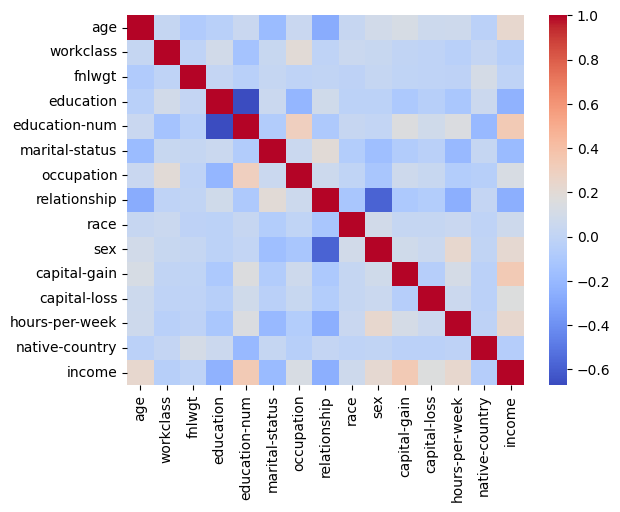

In [199]:
import seaborn as sns

#identify linerar relationship between the input features and target variable -> fature selection
target_train = df_train["income"]
predictors_train = df_train.drop("income", axis=1)
df_corr = pd.concat([predictors_train, target_train], axis = 1 )

g = sns.heatmap(df_corr.corr(),
                annot = False,
                cmap = "coolwarm")


In [200]:
correlation_matrix_train = df_train.corr()
print(correlation_matrix_train)


                     age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.022154 -0.079646  -0.041370       0.043488   
workclass       0.022154   1.000000 -0.006571   0.091465      -0.138763   
fnlwgt         -0.079646  -0.006571  1.000000   0.018411      -0.040894   
education      -0.041370   0.091465  0.018411   1.000000      -0.670251   
education-num   0.043488  -0.138763 -0.040894  -0.670251       1.000000   
marital-status -0.183142   0.039917  0.025942   0.050757      -0.073879   
occupation      0.046385   0.196719 -0.008625  -0.217230       0.301549   
relationship   -0.267009  -0.005403  0.003403   0.085065      -0.092182   
race            0.032427   0.051728 -0.013090  -0.022374       0.032342   
sex             0.092995   0.040440  0.025987  -0.018886       0.010375   
capital-gain    0.125372   0.002741 -0.002442  -0.101109       0.155987   
capital-loss    0.065539  -0.005201 -0.010421  -0.049570       0.084573   
hours-per-week  0.069781 

Corelation analysis by using Pearson correlation to see if there is a non linear correlation into the features

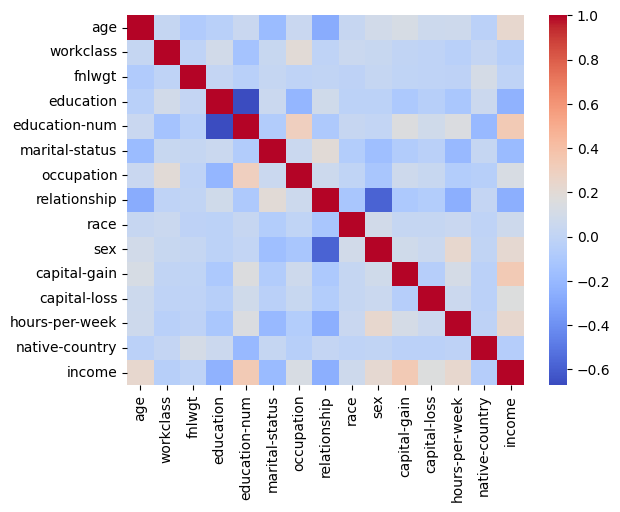

In [201]:
g = sns.heatmap(df_corr.corr(method='pearson'),
                annot = False,
                cmap = "coolwarm")

In [202]:
correlation_matrix_train = df_train.corr(method = 'pearson')
print(correlation_matrix_train)

                     age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.022154 -0.079646  -0.041370       0.043488   
workclass       0.022154   1.000000 -0.006571   0.091465      -0.138763   
fnlwgt         -0.079646  -0.006571  1.000000   0.018411      -0.040894   
education      -0.041370   0.091465  0.018411   1.000000      -0.670251   
education-num   0.043488  -0.138763 -0.040894  -0.670251       1.000000   
marital-status -0.183142   0.039917  0.025942   0.050757      -0.073879   
occupation      0.046385   0.196719 -0.008625  -0.217230       0.301549   
relationship   -0.267009  -0.005403  0.003403   0.085065      -0.092182   
race            0.032427   0.051728 -0.013090  -0.022374       0.032342   
sex             0.092995   0.040440  0.025987  -0.018886       0.010375   
capital-gain    0.125372   0.002741 -0.002442  -0.101109       0.155987   
capital-loss    0.065539  -0.005201 -0.010421  -0.049570       0.084573   
hours-per-week  0.069781 

It seems that only education and education-num are highly correlated (both linear and non linear correlation)
sex and relationship are correlated, but if I remove one of them I can lose informations

In [203]:
df_train.drop('education', axis = 1, inplace = True)
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24764,16,2,14993,8,1,4,0,4,1,0,0,59,1,0
9890,42,2,14724,9,1,0,0,4,1,106,0,49,1,1
2754,63,3,9470,3,1,0,0,4,1,0,0,29,1,0
5298,16,2,3289,8,1,1,5,4,0,0,36,24,1,0
2593,22,2,16027,13,2,3,1,2,1,95,0,51,1,1


In [204]:
df_test.drop('education', axis = 1, inplace = True)
df_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
20334,10,2,2862,13,2,0,1,4,0,0,0,39,1,0
23878,34,0,5553,12,1,1,0,4,1,0,0,49,1,1
19996,17,2,3575,7,1,2,0,4,1,0,0,39,4,0
21440,14,2,1783,11,0,3,1,4,1,0,0,39,1,0
10000,17,2,1526,9,0,1,1,4,0,0,0,49,1,0


FINE PREPROCESSING
Algoritmi ML

In [205]:
X_train = df_train.drop(columns = 'income', axis = 1)
y_train = df_train['income']


In [206]:
X_test = df_test.drop(columns = 'income', axis = 1)
y_test = df_test['income']


Main Mchine Learning Classification Models

In [207]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [208]:
FPRs_list = []
FNRs_list = []

y_preds = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds[name] = y_pred
    print(f"{name} Accuracy: {accuracy:.4f}")

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    FPRs_list.append(FPR)
    FNRs_list.append(FNR)

    print(f"{name} False Positives: {FP}")
    print(f"{name} False Negatives: {FN}")
    print(f"{name} False Positives Rate: {(FPR):.4f}")
    print(f"{name} False Negatives Rate: {(FNR):.4f}")



/Users/mariaantoniettalongo/Desktop/TESI/.tesi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8278
Logistic Regression False Positives: 222
Logistic Regression False Negatives: 899
Logistic Regression False Positives Rate: 0.0449
Logistic Regression False Negatives Rate: 0.5733
Decision Tree Accuracy: 0.7913
Decision Tree False Positives: 537
Decision Tree False Negatives: 821
Decision Tree False Positives Rate: 0.1087
Decision Tree False Negatives Rate: 0.5236
Random Forest Accuracy: 0.8147
Random Forest False Positives: 289
Random Forest False Negatives: 917
Random Forest False Positives Rate: 0.0585
Random Forest False Negatives Rate: 0.5848
Gradient Boosting Accuracy: 0.8281
Gradient Boosting False Positives: 211
Gradient Boosting False Negatives: 908
Gradient Boosting False Positives Rate: 0.0427
Gradient Boosting False Negatives Rate: 0.5791
K-Nearest Neighbors Accuracy: 0.7797
K-Nearest Neighbors False Positives: 322
K-Nearest Neighbors False Negatives: 1112
K-Nearest Neighbors False Positives Rate: 0.0652
K-Nearest Neighbors False Negativ

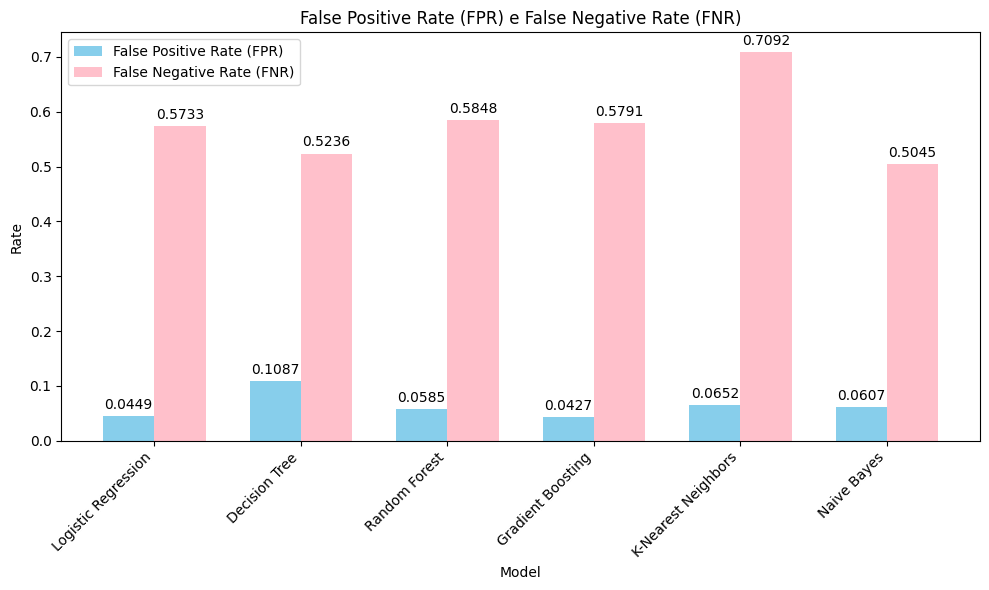

In [209]:
fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.35
index = np.arange(len(classifiers))

bar1 = ax.bar(index, FPRs_list, bar_width, label='False Positive Rate (FPR)', color='skyblue')
bar2 = ax.bar(index + bar_width, FNRs_list, bar_width, label='False Negative Rate (FNR)', color='pink')

ax.set_xlabel('Model')
ax.set_ylabel('Rate')
ax.set_title('False Positive Rate (FPR) e False Negative Rate (FNR)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classifiers.keys(), rotation=45, ha='right')
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()

SUBGROUPS SEARCH

In [210]:
! pip install divexplorer

In [211]:
from divexplorer import DivergenceExplorer

For every model:

-I define pandas df which contains: X_test, y_test, y_pred by the model;

-I apply DivExplorer;

-I see how the false positive rate changes in the subgroups w.r.t. the overall dataset;

-Compute e plot local/global shapley values

**Logistic Regression**

In [212]:
df_test_lr = X_test.copy()
df_test_lr['y_test'] = y_test
df_test_lr['y_pred_lr'] = y_preds["Logistic Regression"]
df_test_lr.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_lr
20334,10,2,2862,13,2,0,1,4,0,0,0,39,1,0,0
23878,34,0,5553,12,1,1,0,4,1,0,0,49,1,1,1
19996,17,2,3575,7,1,2,0,4,1,0,0,39,4,0,0
21440,14,2,1783,11,0,3,1,4,1,0,0,39,1,0,0
10000,17,2,1526,9,0,1,1,4,0,0,0,49,1,0,0


In [213]:
from divexplorer.outcomes import get_false_positive_rate_outcome

y_trues = df_test_lr["y_test"]
y_preds = df_test_lr["y_pred_lr"]

df_test_lr['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)
df_test_lr[100:110]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_lr,fp
4154,16,2,1995,15,1,4,0,4,1,0,0,54,1,1,1,NaN
19357,9,2,5167,12,2,4,1,4,0,0,0,44,1,0,0,0.0
14771,8,2,3226,8,2,1,1,4,1,0,0,39,1,0,0,0.0
15995,46,2,3173,8,4,0,2,2,0,0,0,39,1,0,0,0.0
28488,13,2,2508,8,1,0,0,4,1,0,0,39,1,0,0,0.0
15589,13,2,4952,13,2,4,1,2,1,0,0,29,1,0,0,0.0
23309,40,2,1784,8,4,3,4,4,0,0,0,44,1,0,0,0.0
28534,9,0,3259,13,2,4,1,4,0,0,0,39,0,0,0,0.0
22692,7,2,5034,9,2,3,1,4,1,0,0,63,1,0,0,0.0
23311,33,3,640,8,1,3,1,4,1,0,0,59,1,0,0,0.0


In [214]:
fp_diver = DivergenceExplorer(df_test_lr)

attributes = ['age', 'workclass', 'sex', 'race', 'hours-per-week']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm.head(10)



,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.067763,"(workclass=0, race=4, sex=1)",0.173077,0.128138,5.516989,3,441.0
1,0.079902,"(workclass=0, sex=1)",0.161905,0.116965,5.669400,2,520.0
2,0.086970,"(workclass=3, race=4, sex=1)",0.133333,0.088394,4.861336,3,566.0
3,0.094345,"(workclass=3, sex=1)",0.129380,0.084441,4.868390,2,614.0
4,0.100645,"(workclass=3, race=4)",0.115479,0.070540,4.468163,2,655.0
5,0.064997,"(hours-per-week=49, race=4, sex=1)",0.111628,0.066689,3.211257,3,423.0
6,0.109711,(workclass=3),0.110609,0.065670,4.411059,1,714.0
7,0.071143,"(hours-per-week=49, sex=1)",0.109705,0.064765,3.286241,2,463.0
8,0.107406,"(workclass=0, race=4)",0.107066,0.062127,4.339522,2,699.0
9,0.078058,"(hours-per-week=49, race=4)",0.098540,0.053601,3.064608,2,508.0


In [215]:
sex1 = get_original_label('sex', 1)
workclass0 = get_original_label('workclass', 0)
race4 = get_original_label('race', 4)
print(f"sex = 1 means: {sex1}, workclass = 0 means: {workclass0}, race = 4 means: {race4}  ")

sex = 1 means: Male, workclass = 0 means: Government, race = 4 means: White  


The subgroup with highest false-positive rate is (sex = "Male", workclass = "Government), and they have a rate of 30.1%, which is 24% above the average false-positive rate. The t-statistic is 9.25, which indicates high significance. There are 520 instances in this subgroup.

In [216]:
print(f"Recall that the False Positive Rate for the overall Logistic Regression was: {FPRs_list[0]}" )

Recall that the False Positive Rate for the overall Logistic Regression was: 0.044939271255060725


Shapley Value

In [217]:
from divexplorer import DivergencePatternProcessor


In [218]:
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)


sv = fp_details.shapley_value(pattern)
sv

frozenset({'workclass=0', 'race=4', 'sex=1'})


{frozenset({'workclass=0'}): 0.07434400387429091,
 frozenset({'race=4'}): 0.008698678431603407,
 frozenset({'sex=1'}): 0.04509496951596803}

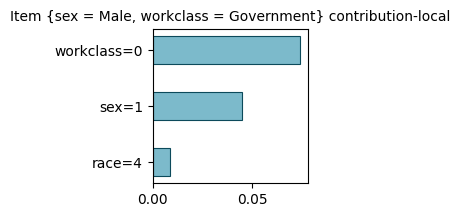

In [219]:
fp_details.plot_shapley_value(pattern = pattern, figsize=(2,2), title= "Item {sex = Male, workclass = Government} contribution-local")

In [220]:
gsv = fp_details.global_shapley_value()
gsv

{frozenset({'workclass=3'}): 0.005723234211630285,
 frozenset({'hours-per-week=49'}): 0.006172088888871298,
 frozenset({'workclass=0'}): 0.005593203395294525,
 frozenset({'sex=1'}): 0.005714419675334118,
 frozenset({'hours-per-week=44'}): 0.0021741512574387834,
 frozenset({'race=4'}): 0.001453752949990185,
 frozenset({'workclass=2'}): -0.001899276083914768,
 frozenset({'hours-per-week=39'}): -0.00305633321686297,
 frozenset({'workclass=4'}): -0.001445776104531638,
 frozenset({'race=2'}): -0.005379114860525577,
 frozenset({'sex=0'}): -0.007759411214964261}

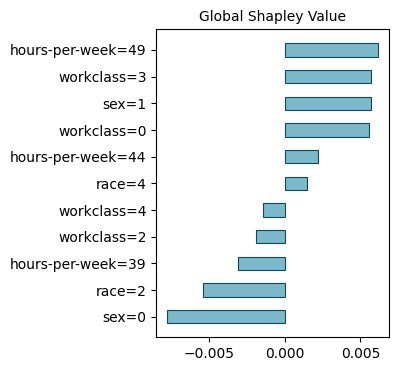

In [221]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value')



In [222]:
workclass0 = get_original_label('workclass', 0)
sex1 = get_original_label('sex', 1)
race2 = get_original_label('race', 2)
workclass3 = get_original_label('workclass', 3)
workclass4 = get_original_label('workclass', 4)
workclass2 = get_original_label('workclass', 2)
race4 = get_original_label('race', 4)
sex0 = get_original_label('sex', 0)
print(f" \n workclass = 0 means: {workclass0}, \n sex = 1 means: {sex1}, \n race = 2 means: {race2}, \n workclass = 3 means: {workclass3}, \n workclass = 4 means: {workclass4}, \n workclass = 2 means: {workclass2},   \n race = 4 means: {race4}, \n sex = 0 means: {sex0}  ")

 
 workclass = 0 means: Government, 
 sex = 1 means: Male, 
 race = 2 means: Black, 
 workclass = 3 means: Self-emp, 
 workclass = 4 means: Unknown, 
 workclass = 2 means: Private,   
 race = 4 means: White, 
 sex = 0 means: Female  


In [223]:
#errore da sistemare: le celle seguenti sono runnabili senza errori solo se eseguo il run di questa cella
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}
FPRs_list = []
FNRs_list = []

y_preds = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds[name] = y_pred

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    FPRs_list.append(FPR)
    FNRs_list.append(FNR)

/Users/mariaantoniettalongo/Desktop/TESI/.tesi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree**

In [224]:
df_test_dt = X_test.copy()
df_test_dt['y_test'] = y_test
df_test_dt['y_pred_dt'] = y_preds["Decision Tree"]
df_test_dt.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_dt
20334,10,2,2862,13,2,0,1,4,0,0,0,39,1,0,0
23878,34,0,5553,12,1,1,0,4,1,0,0,49,1,1,1
19996,17,2,3575,7,1,2,0,4,1,0,0,39,4,0,0
21440,14,2,1783,11,0,3,1,4,1,0,0,39,1,0,0
10000,17,2,1526,9,0,1,1,4,0,0,0,49,1,0,0


In [225]:
y_trues = df_test_dt["y_test"]
y_preds = df_test_dt["y_pred_dt"]

df_test_dt['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)
df_test_dt[100:110]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_dt,fp
4154,16,2,1995,15,1,4,0,4,1,0,0,54,1,1,0,NaN
19357,9,2,5167,12,2,4,1,4,0,0,0,44,1,0,0,0.0
14771,8,2,3226,8,2,1,1,4,1,0,0,39,1,0,0,0.0
15995,46,2,3173,8,4,0,2,2,0,0,0,39,1,0,0,0.0
28488,13,2,2508,8,1,0,0,4,1,0,0,39,1,0,0,0.0
15589,13,2,4952,13,2,4,1,2,1,0,0,29,1,0,0,0.0
23309,40,2,1784,8,4,3,4,4,0,0,0,44,1,0,0,0.0
28534,9,0,3259,13,2,4,1,4,0,0,0,39,0,0,0,0.0
22692,7,2,5034,9,2,3,1,4,1,0,0,63,1,0,0,0.0
23311,33,3,640,8,1,3,1,4,1,0,0,59,1,0,0,0.0


In [226]:
fp_diver = DivergenceExplorer(df_test_dt)

attributes = ['age', 'workclass', 'sex', 'race', 'hours-per-week']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm.head(10)

,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.071143,"(hours-per-week=49, sex=1)",0.257384,0.145643,5.149611,2,463.0
1,0.064997,"(hours-per-week=49, race=4, sex=1)",0.255814,0.144073,4.876568,3,423.0
2,0.078058,"(hours-per-week=49, race=4)",0.222628,0.110887,4.425769,2,508.0
3,0.085280,(hours-per-week=49),0.221854,0.110113,4.604321,1,555.0
4,0.053626,"(hours-per-week=49, race=4, workclass=2)",0.219895,0.108154,3.670901,3,349.0
5,0.058236,"(hours-per-week=49, workclass=2)",0.219048,0.107307,3.810782,2,379.0
6,0.094345,"(workclass=3, sex=1)",0.218329,0.106588,4.933567,2,614.0
7,0.086970,"(workclass=3, race=4, sex=1)",0.217391,0.105650,4.735894,3,566.0
8,0.109711,(workclass=3),0.194131,0.082390,4.330446,1,714.0
9,0.100645,"(workclass=3, race=4)",0.194103,0.082362,4.164998,2,655.0


In [227]:
sex1 = get_original_label('sex', 1)
race4 = get_original_label('race', 4)
workclass2 = get_original_label('workclass', 2)
workclass3 = get_original_label('workclass', 3)
workclass0 = get_original_label('workclass', 0)
print(f"sex = 1 means: {sex1}, race = 4 means: {race4} , workclass = 2 means: {workclass2}, workclass = 3 means: {workclass3}, workclass = 0 means: {workclass0}")

sex = 1 means: Male, race = 4 means: White , workclass = 2 means: Private, workclass = 3 means: Self-emp, workclass = 0 means: Government


The subgroup with highest false-positive rate is (sex = "Male", race = "White", hours-per-week = 49), and they have a rate of 25,1%, which is 13% above the average false-positive rate. The t-statistic is 4.6, which indicates high significance. There are 423 instances in this subgroup.

In [228]:
print(f"Recall that the False Positive Rate for the overall Decision Tree was: {FPRs_list[1]*100}" )

Recall that the False Positive Rate for the overall Decision Tree was: 11.17408906882591


In [229]:
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)


sv = fp_details.shapley_value(pattern)
sv

frozenset({'hours-per-week=49', 'sex=1'})


{frozenset({'hours-per-week=49'}): 0.10737793291595746,
 frozenset({'sex=1'}): 0.0382651426405092}

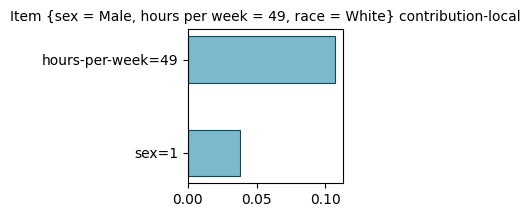

In [230]:
fp_details.plot_shapley_value(pattern = pattern, figsize=(2,2), title= "Item {sex = Male, hours per week = 49, race = White} contribution-local")

In [231]:
gsv = fp_details.global_shapley_value()
gsv

{frozenset({'hours-per-week=49'}): 0.01396830794059985,
 frozenset({'workclass=3'}): 0.0069432952660256585,
 frozenset({'hours-per-week=44'}): 0.004236348811747824,
 frozenset({'sex=1'}): 0.009677516828307305,
 frozenset({'workclass=0'}): 0.0010875909705965166,
 frozenset({'race=4'}): 0.0011083717799972098,
 frozenset({'workclass=2'}): -0.0013250850160752559,
 frozenset({'hours-per-week=39'}): -0.0013913922865567716,
 frozenset({'workclass=4'}): -0.0015320922723775655,
 frozenset({'race=2'}): -0.00778435945596879,
 frozenset({'sex=0'}): -0.013900764354873684}

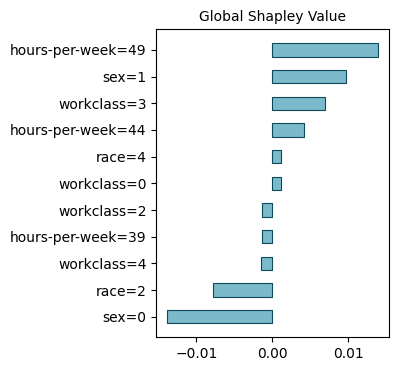

In [232]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value')

In [233]:
sex1 = get_original_label('sex', 1)
workclass3 = get_original_label('workclass', 3)
workclass0 = get_original_label('workclass', 0)
race4 = get_original_label('race', 4)
workclass2 = get_original_label('workclass', 2)
workclass4 = get_original_label('workclass', 4)
race2 = get_original_label('race', 2)
sex0 = get_original_label('sex', 0)
print(f"\n sex = 1 means: {sex1}, \n workclass = 3 means: {workclass3}, \n workclass = 0 means: {workclass0},  \n race = 4 means: {race4},  \n workclass = 2 means: {workclass2}, \n workclass = 4 means: {workclass4},   \n race = 2 means: {race2}, \n sex = 0 means: {sex0}  ")


 sex = 1 means: Male, 
 workclass = 3 means: Self-emp, 
 workclass = 0 means: Government,  
 race = 4 means: White,  
 workclass = 2 means: Private, 
 workclass = 4 means: Unknown,   
 race = 2 means: Black, 
 sex = 0 means: Female  


**Random Forest**

In [234]:
#errore da sistemare: le celle seguenti sono runnabili senza errori solo se eseguo il run di questa cella
FPRs_list = []
FNRs_list = []

y_preds = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds[name] = y_pred

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    FPRs_list.append(FPR)
    FNRs_list.append(FNR)

/Users/mariaantoniettalongo/Desktop/TESI/.tesi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [235]:
df_test_rf = X_test.copy()
df_test_rf['y_test'] = y_test
df_test_rf['y_pred_rf'] = y_preds["Random Forest"]
df_test_rf.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_rf
20334,10,2,2862,13,2,0,1,4,0,0,0,39,1,0,0
23878,34,0,5553,12,1,1,0,4,1,0,0,49,1,1,1
19996,17,2,3575,7,1,2,0,4,1,0,0,39,4,0,0
21440,14,2,1783,11,0,3,1,4,1,0,0,39,1,0,0
10000,17,2,1526,9,0,1,1,4,0,0,0,49,1,0,0


In [236]:
y_trues = df_test_rf["y_test"]
y_preds = df_test_rf["y_pred_rf"]

df_test_rf['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)
df_test_rf[100:110]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_rf,fp
4154,16,2,1995,15,1,4,0,4,1,0,0,54,1,1,1,NaN
19357,9,2,5167,12,2,4,1,4,0,0,0,44,1,0,0,0.0
14771,8,2,3226,8,2,1,1,4,1,0,0,39,1,0,0,0.0
15995,46,2,3173,8,4,0,2,2,0,0,0,39,1,0,0,0.0
28488,13,2,2508,8,1,0,0,4,1,0,0,39,1,0,0,0.0
15589,13,2,4952,13,2,4,1,2,1,0,0,29,1,0,0,0.0
23309,40,2,1784,8,4,3,4,4,0,0,0,44,1,0,0,0.0
28534,9,0,3259,13,2,4,1,4,0,0,0,39,0,0,0,0.0
22692,7,2,5034,9,2,3,1,4,1,0,0,63,1,0,0,0.0
23311,33,3,640,8,1,3,1,4,1,0,0,59,1,0,0,0.0


In [237]:
fp_diver = DivergenceExplorer(df_test_rf)

attributes = ['age', 'workclass', 'sex', 'race', 'hours-per-week']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm.head(10)

,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.071143,"(hours-per-week=49, sex=1)",0.181435,0.122123,4.936530,2,463.0
1,0.064997,"(hours-per-week=49, race=4, sex=1)",0.181395,0.122084,4.715157,3,423.0
2,0.053626,"(hours-per-week=49, race=4, workclass=2)",0.167539,0.108228,4.093134,3,349.0
3,0.058236,"(hours-per-week=49, workclass=2)",0.161905,0.102593,4.115485,2,379.0
4,0.078058,"(hours-per-week=49, race=4)",0.160584,0.101272,4.612837,2,508.0
5,0.085280,(hours-per-week=49),0.158940,0.099629,4.769536,1,555.0
6,0.067763,"(workclass=0, race=4, sex=1)",0.115385,0.056073,2.912629,3,441.0
7,0.079902,"(workclass=0, sex=1)",0.114286,0.054974,3.124339,2,520.0
8,0.053165,"(hours-per-week=44, race=4)",0.112195,0.052883,2.514307,2,346.0
9,0.094345,"(workclass=3, sex=1)",0.110512,0.051200,3.182553,2,614.0


In [238]:
workclass2 = get_original_label('workclass', 2)
race4 = get_original_label('race', 4)
sex1 = get_original_label('sex', 1)
workclass0 = get_original_label('workclass', 0)
workclass3 = get_original_label('workclass', 3)
print(f" workclass = 2 means: {workclass2}, race = 4 means: {race4} ,  sex = 1 means: {sex1},workclass = 0 means: {workclass0}, workclass = 3 means: {workclass3}")

 workclass = 2 means: Private, race = 4 means: White ,  sex = 1 means: Male,workclass = 0 means: Government, workclass = 3 means: Self-emp


The subgroup with highest false-positive rate is (workclass = "Private", hours per week = 49, race = "White"), and they have a rate of 17.8%, which is 12% above the average false-positive rate. The t-statistic is 4.4, which indicates high significance. There are 349\ instances in this subgroup.

In [239]:
print(f"Recall that the False Positive Rate for the overall Random Forest was: {FPRs_list[2]*100}" )

Recall that the False Positive Rate for the overall Random Forest was: 5.9311740890688265


In [240]:
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)


sv = fp_details.shapley_value(pattern)
sv

frozenset({'hours-per-week=49', 'sex=1'})


{frozenset({'hours-per-week=49'}): 0.09842980013197142,
 frozenset({'sex=1'}): 0.023693058133458463}

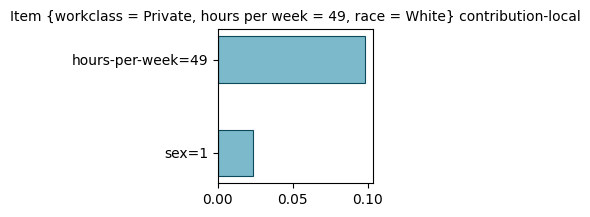

In [241]:
fp_details.plot_shapley_value(pattern = pattern, figsize=(2,2), title= "Item {workclass = Private, hours per week = 49, race = White} contribution-local")

In [242]:
gsv = fp_details.global_shapley_value()
gsv

{frozenset({'hours-per-week=49'}): 0.012733344547027058,
 frozenset({'hours-per-week=44'}): 0.0043120839079343245,
 frozenset({'workclass=3'}): 0.003087325922121311,
 frozenset({'sex=1'}): 0.005938779077992281,
 frozenset({'workclass=0'}): 0.0013888877130264936,
 frozenset({'race=4'}): 0.0012392251804952707,
 frozenset({'workclass=2'}): -0.000531930506303951,
 frozenset({'hours-per-week=39'}): -0.0011615809019480889,
 frozenset({'workclass=4'}): -0.0013705352075371754,
 frozenset({'sex=0'}): -0.00825363538559272,
 frozenset({'race=2'}): -0.007002780139911828}

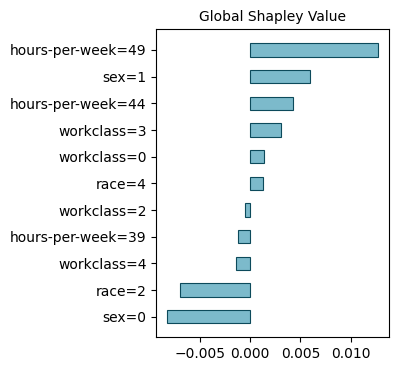

In [243]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value')

In [244]:
sex1 = get_original_label('sex', 1)
workclass3 = get_original_label('workclass', 3)
race4 = get_original_label('race', 4)
workclass0 = get_original_label('workclass', 0)
workclass4 = get_original_label('workclass', 4)
race2 = get_original_label('race', 2)
sex0 = get_original_label('sex', 0)
print(f"\n sex = 1 means: {sex1}, \n workclass = 3 means: {workclass3},  \n race = 4 means: {race4}, \n workclass = 0 means: {workclass0},   \n workclass = 4 means: {workclass4},    \n race = 2 means: {race2}, \n sex = 0 means: {sex0}  ")


 sex = 1 means: Male, 
 workclass = 3 means: Self-emp,  
 race = 4 means: White, 
 workclass = 0 means: Government,   
 workclass = 4 means: Unknown,    
 race = 2 means: Black, 
 sex = 0 means: Female  


**Gradient Boosting**

In [245]:
#errore da sistemare: le celle seguenti sono runnabili senza errori solo se eseguo il run di questa cella
FPRs_list = []
FNRs_list = []

y_preds = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds[name] = y_pred

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    FPRs_list.append(FPR)
    FNRs_list.append(FNR)

/Users/mariaantoniettalongo/Desktop/TESI/.tesi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [246]:
df_test_gb = X_test.copy()
df_test_gb['y_test'] = y_test
df_test_gb['y_pred_gb'] = y_preds["Gradient Boosting"]
df_test_gb.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_gb
20334,10,2,2862,13,2,0,1,4,0,0,0,39,1,0,0
23878,34,0,5553,12,1,1,0,4,1,0,0,49,1,1,1
19996,17,2,3575,7,1,2,0,4,1,0,0,39,4,0,0
21440,14,2,1783,11,0,3,1,4,1,0,0,39,1,0,0
10000,17,2,1526,9,0,1,1,4,0,0,0,49,1,0,0


In [247]:
y_trues = df_test_gb["y_test"]
y_preds = df_test_gb["y_pred_gb"]

df_test_gb['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)
df_test_gb[100:110]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_gb,fp
4154,16,2,1995,15,1,4,0,4,1,0,0,54,1,1,1,NaN
19357,9,2,5167,12,2,4,1,4,0,0,0,44,1,0,0,0.0
14771,8,2,3226,8,2,1,1,4,1,0,0,39,1,0,0,0.0
15995,46,2,3173,8,4,0,2,2,0,0,0,39,1,0,0,0.0
28488,13,2,2508,8,1,0,0,4,1,0,0,39,1,0,0,0.0
15589,13,2,4952,13,2,4,1,2,1,0,0,29,1,0,0,0.0
23309,40,2,1784,8,4,3,4,4,0,0,0,44,1,0,0,0.0
28534,9,0,3259,13,2,4,1,4,0,0,0,39,0,0,0,0.0
22692,7,2,5034,9,2,3,1,4,1,0,0,63,1,0,0,0.0
23311,33,3,640,8,1,3,1,4,1,0,0,59,1,0,0,0.0


In [248]:
fp_diver = DivergenceExplorer(df_test_gb)

attributes = ['age', 'workclass', 'sex', 'race', 'hours-per-week']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm.head(10)

,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.064997,"(hours-per-week=49, race=4, sex=1)",0.148837,0.106125,4.457811,3,423.0
1,0.071143,"(hours-per-week=49, sex=1)",0.143460,0.100747,4.501441,2,463.0
2,0.067763,"(workclass=0, race=4, sex=1)",0.126923,0.084211,4.152395,3,441.0
3,0.078058,"(hours-per-week=49, race=4)",0.120438,0.077725,4.023376,2,508.0
4,0.079902,"(workclass=0, sex=1)",0.117460,0.074748,4.174130,2,520.0
5,0.085280,(hours-per-week=49),0.115894,0.073181,4.033482,1,555.0
6,0.094345,"(workclass=3, sex=1)",0.107817,0.065104,4.079558,2,614.0
7,0.086970,"(workclass=3, race=4, sex=1)",0.101449,0.058737,3.665996,3,566.0
8,0.053626,"(hours-per-week=49, race=4, workclass=2)",0.094241,0.051528,2.573759,3,349.0
9,0.109711,(workclass=3),0.092551,0.049838,3.640934,1,714.0


In [249]:
sex1 = get_original_label('sex', 1)
race4 = get_original_label('race', 4)
workclass0 = get_original_label('workclass', 0)
workclass3 = get_original_label('workclass', 3)
workclass2 = get_original_label('workclass', 2)
print(f" sex = 1 means: {sex1}, race = 4 means: {race4}, workclass = 0 means: {workclass0}, workclass = 3 means: {workclass3}, workclass = 2 means: {workclass2}  ")

 sex = 1 means: Male, race = 4 means: White, workclass = 0 means: Government, workclass = 3 means: Self-emp, workclass = 2 means: Private  


The subgroup with highest false-positive rate is (sex = "Male", race = "White", hours-per-week = 49), and they have a rate of 14,8%, which is 10% above the average false-positive rate. The t-statistic is 4.45, which indicates high significance. There are 423 instances in this subgroup.

In [250]:
print(f"Recall that the False Positive Rate for the overall Gradient Boosting was: {FPRs_list[3]*100}" )

Recall that the False Positive Rate for the overall Gradient Boosting was: 4.271255060728745


In [251]:
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)


sv = fp_details.shapley_value(pattern)
sv

frozenset({'hours-per-week=49', 'race=4', 'sex=1'})


{frozenset({'hours-per-week=49'}): 0.07894426736793014,
 frozenset({'race=4'}): 0.0036612556283181054,
 frozenset({'sex=1'}): 0.023519135698789863}

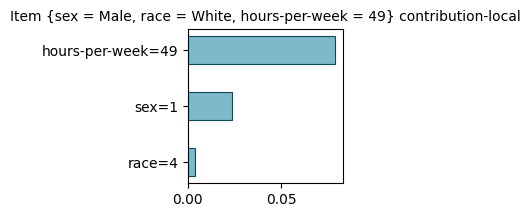

In [252]:
fp_details.plot_shapley_value(pattern = pattern, figsize=(2,2), title= "Item {sex = Male, race = White, hours-per-week = 49} contribution-local")

In [253]:
gsv = fp_details.global_shapley_value()
gsv

{frozenset({'hours-per-week=49'}): 0.009436523124974996,
 frozenset({'workclass=3'}): 0.004244267700609118,
 frozenset({'hours-per-week=44'}): 0.003761725482874179,
 frozenset({'workclass=0'}): 0.0034585525236172842,
 frozenset({'sex=1'}): 0.004845850879490985,
 frozenset({'race=4'}): 0.000587488462558892,
 frozenset({'workclass=2'}): -0.00134022547291515,
 frozenset({'hours-per-week=39'}): -0.002421655307444888,
 frozenset({'workclass=4'}): -0.0015013101138900452,
 frozenset({'sex=0'}): -0.006045132317022515,
 frozenset({'race=2'}): -0.004838660585917155}

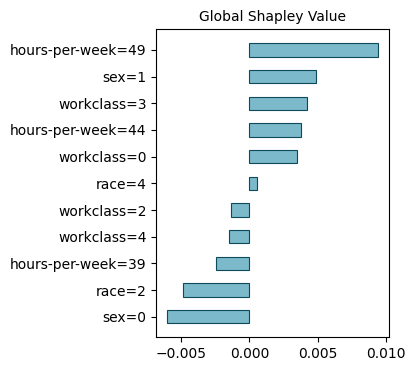

In [254]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value')

In [255]:
sex1 = get_original_label('sex', 1)
workclass3 = get_original_label('workclass', 3)
workclass0 = get_original_label('workclass', 0)
race4 = get_original_label('race', 4)
workclass2 = get_original_label('workclass', 2)
workclass4 = get_original_label('workclass', 4)
race2 = get_original_label('race', 2)
sex0 = get_original_label('sex', 0)
print(f"\n sex = 1 means: {sex1}, \n workclass = 3 means: {workclass3},\n workclass = 0 means: {workclass0},  \n race = 4 means: {race4}, \n workclass = 2 means: {workclass2},    \n workclass = 4 means: {workclass4},    \n race = 2 means: {race2}, \n sex = 0 means: {sex0}  ")


 sex = 1 means: Male, 
 workclass = 3 means: Self-emp,
 workclass = 0 means: Government,  
 race = 4 means: White, 
 workclass = 2 means: Private,    
 workclass = 4 means: Unknown,    
 race = 2 means: Black, 
 sex = 0 means: Female  


**K-Nearest Neighbors**

In [256]:
#errore da sistemare: le celle seguenti sono runnabili senza errori solo se eseguo il run di questa cella
FPRs_list = []
FNRs_list = []

y_preds = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds[name] = y_pred

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    FPRs_list.append(FPR)
    FNRs_list.append(FNR)

/Users/mariaantoniettalongo/Desktop/TESI/.tesi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [257]:
df_test_knn = X_test.copy()
df_test_knn['y_test'] = y_test
df_test_knn['y_pred_knn'] = y_preds["K-Nearest Neighbors"]
df_test_knn.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_knn
20334,10,2,2862,13,2,0,1,4,0,0,0,39,1,0,0
23878,34,0,5553,12,1,1,0,4,1,0,0,49,1,1,0
19996,17,2,3575,7,1,2,0,4,1,0,0,39,4,0,0
21440,14,2,1783,11,0,3,1,4,1,0,0,39,1,0,0
10000,17,2,1526,9,0,1,1,4,0,0,0,49,1,0,0


In [258]:
y_trues = df_test_knn["y_test"]
y_preds = df_test_knn["y_pred_knn"]

df_test_knn['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)
df_test_knn[100:110]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_knn,fp
4154,16,2,1995,15,1,4,0,4,1,0,0,54,1,1,0,NaN
19357,9,2,5167,12,2,4,1,4,0,0,0,44,1,0,0,0.0
14771,8,2,3226,8,2,1,1,4,1,0,0,39,1,0,0,0.0
15995,46,2,3173,8,4,0,2,2,0,0,0,39,1,0,0,0.0
28488,13,2,2508,8,1,0,0,4,1,0,0,39,1,0,0,0.0
15589,13,2,4952,13,2,4,1,2,1,0,0,29,1,0,0,0.0
23309,40,2,1784,8,4,3,4,4,0,0,0,44,1,0,0,0.0
28534,9,0,3259,13,2,4,1,4,0,0,0,39,0,0,0,0.0
22692,7,2,5034,9,2,3,1,4,1,0,0,63,1,0,0,0.0
23311,33,3,640,8,1,3,1,4,1,0,0,59,1,0,0,0.0


In [259]:
fp_diver = DivergenceExplorer(df_test_knn)

attributes = ['age', 'workclass', 'sex', 'race', 'hours-per-week']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm.head(10)

,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.094345,"(workclass=3, sex=1)",0.121294,0.056112,3.338696,2,614.0
1,0.079902,"(workclass=0, sex=1)",0.120635,0.055453,3.075396,2,520.0
2,0.067763,"(workclass=0, race=4, sex=1)",0.119231,0.054049,2.770418,3,441.0
3,0.086970,"(workclass=3, race=4, sex=1)",0.118841,0.053658,3.122002,3,566.0
4,0.109711,(workclass=3),0.112867,0.047685,3.179818,1,714.0
5,0.100645,"(workclass=3, race=4)",0.110565,0.045383,2.945481,2,655.0
6,0.064997,"(hours-per-week=49, race=4, sex=1)",0.106977,0.041795,2.101202,3,423.0
7,0.078058,"(hours-per-week=49, race=4)",0.102190,0.037008,2.117307,2,508.0
8,0.053626,"(hours-per-week=49, race=4, workclass=2)",0.099476,0.034294,1.726757,3,349.0
9,0.071143,"(hours-per-week=49, sex=1)",0.097046,0.031864,1.778192,2,463.0


In [260]:
workclass3 = get_original_label('workclass', 3)
sex1 = get_original_label('sex', 1)
workclass0 = get_original_label('workclass', 0)
race4 = get_original_label('race', 4)
workclass2 = get_original_label('workclass', 2)


print(f"workclass = 3 means: {workclass3}, sex = 1 means: {sex1}, workclass = 0 means: {workclass0}, race = 4 means: {race4} , workclass = 2 means: {workclass2}")

workclass = 3 means: Self-emp, sex = 1 means: Male, workclass = 0 means: Government, race = 4 means: White , workclass = 2 means: Private


The subgroup with highest false-positive rate is (sex = "Male", workclass = Self-emp), and they have a rate of 12,1%, which is 5.5% above the average false-positive rate. The t-statistic is 3.32, which indicates high significance. There are 614 instances in this subgroup.

In [261]:
print(f"Recall that the False Positive Rate for the overall K-Nearest Neighbors was: {FPRs_list[4]*100}" )

Recall that the False Positive Rate for the overall K-Nearest Neighbors was: 6.518218623481781


In [262]:
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)


sv = fp_details.shapley_value(pattern)
sv

frozenset({'workclass=3', 'sex=1'})


{frozenset({'workclass=3'}): 0.04630383713993265,
 frozenset({'sex=1'}): 0.009807777164333106}

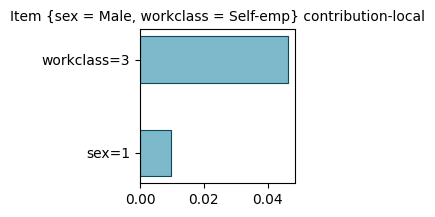

In [263]:
fp_details.plot_shapley_value(pattern = pattern, figsize=(2,2), title= "Item {sex = Male, workclass = Self-emp} contribution-local")

In [264]:
gsv = fp_details.global_shapley_value()
gsv

{frozenset({'workclass=3'}): 0.004131884416363559,
 frozenset({'hours-per-week=49'}): 0.003987728847853605,
 frozenset({'workclass=0'}): 0.003222350847733145,
 frozenset({'hours-per-week=44'}): 0.0016021557607788588,
 frozenset({'sex=1'}): 0.002553479361004265,
 frozenset({'race=4'}): 0.0001181943375227605,
 frozenset({'race=2'}): -0.0006115821332209258,
 frozenset({'hours-per-week=39'}): -0.0014513594906428245,
 frozenset({'workclass=2'}): -0.00120493272946796,
 frozenset({'sex=0'}): -0.0037710288520301045,
 frozenset({'workclass=4'}): -0.0013480299418567984}

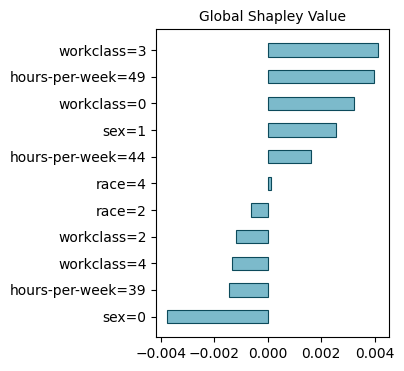

In [265]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value')

In [266]:
workclass3 = get_original_label('workclass', 3)
workclass0 = get_original_label('workclass', 0)
sex1 = get_original_label('sex', 1)
race4 = get_original_label('race', 4)
race2 = get_original_label('race', 2)
workclass2 = get_original_label('workclass', 2)
workclass4 = get_original_label('workclass', 4)
sex0 = get_original_label('sex', 0)
print(f"\n workclass = 3 means: {workclass3},\n workclass = 0 means: {workclass0}, \n sex = 1 means: {sex1},   \n race = 4 means: {race4}, \n race = 2 means: {race2}, \n workclass = 2 means: {workclass2},    \n workclass = 4 means: {workclass4},     \n sex = 0 means: {sex0}  ")


 workclass = 3 means: Self-emp,
 workclass = 0 means: Government, 
 sex = 1 means: Male,   
 race = 4 means: White, 
 race = 2 means: Black, 
 workclass = 2 means: Private,    
 workclass = 4 means: Unknown,     
 sex = 0 means: Female  


**Naive Bayes**

In [267]:
#errore da sistemare: le celle seguenti sono runnabili senza errori solo se eseguo il run di questa cella
FPRs_list = []
FNRs_list = []

y_preds = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds[name] = y_pred

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    FPRs_list.append(FPR)
    FNRs_list.append(FNR)

/Users/mariaantoniettalongo/Desktop/TESI/.tesi/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [268]:
df_test_nb = X_test.copy()
df_test_nb['y_test'] = y_test
df_test_nb['y_pred_nb'] = y_preds["Naive Bayes"]
df_test_nb.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_nb
20334,10,2,2862,13,2,0,1,4,0,0,0,39,1,0,0
23878,34,0,5553,12,1,1,0,4,1,0,0,49,1,1,1
19996,17,2,3575,7,1,2,0,4,1,0,0,39,4,0,0
21440,14,2,1783,11,0,3,1,4,1,0,0,39,1,0,0
10000,17,2,1526,9,0,1,1,4,0,0,0,49,1,0,0


In [269]:
y_trues = df_test_nb["y_test"]
y_preds = df_test_nb["y_pred_nb"]

df_test_nb['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)
df_test_nb[100:110]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_test,y_pred_nb,fp
4154,16,2,1995,15,1,4,0,4,1,0,0,54,1,1,1,NaN
19357,9,2,5167,12,2,4,1,4,0,0,0,44,1,0,0,0.0
14771,8,2,3226,8,2,1,1,4,1,0,0,39,1,0,0,0.0
15995,46,2,3173,8,4,0,2,2,0,0,0,39,1,0,0,0.0
28488,13,2,2508,8,1,0,0,4,1,0,0,39,1,0,0,0.0
15589,13,2,4952,13,2,4,1,2,1,0,0,29,1,0,0,0.0
23309,40,2,1784,8,4,3,4,4,0,0,0,44,1,0,0,0.0
28534,9,0,3259,13,2,4,1,4,0,0,0,39,0,0,0,0.0
22692,7,2,5034,9,2,3,1,4,1,0,0,63,1,0,0,0.0
23311,33,3,640,8,1,3,1,4,1,0,0,59,1,0,0,0.0


In [270]:
fp_diver = DivergenceExplorer(df_test_nb)

attributes = ['age', 'workclass', 'sex', 'race', 'hours-per-week']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm.head(10)

,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.067763,"(workclass=0, race=4, sex=1)",0.196154,0.135425,5.540725,3,441.0
1,0.079902,"(workclass=0, sex=1)",0.165079,0.104351,5.013541,2,520.0
2,0.064997,"(hours-per-week=49, race=4, sex=1)",0.153488,0.092760,3.853639,3,423.0
3,0.071143,"(hours-per-week=49, sex=1)",0.143460,0.082731,3.707121,2,463.0
4,0.086970,"(workclass=3, race=4, sex=1)",0.139130,0.078402,4.232101,3,566.0
5,0.094345,"(workclass=3, sex=1)",0.137466,0.076738,4.306115,2,614.0
6,0.107406,"(workclass=0, race=4)",0.128480,0.067751,4.353830,2,699.0
7,0.078058,"(hours-per-week=49, race=4)",0.127737,0.067008,3.388458,2,508.0
8,0.100645,"(workclass=3, race=4)",0.120393,0.059664,3.710672,2,655.0
9,0.085280,(hours-per-week=49),0.119205,0.058477,3.195552,1,555.0


In [271]:
sex1 = get_original_label('sex', 1)
workclass0 = get_original_label('workclass', 0)
race4 = get_original_label('race', 4)
workclass3 = get_original_label('workclass', 3)

print(f"sex = 1 means: {sex1}, workclass = 0 means: {workclass0}, race = 4 means: {race4} ,workclass = 3 means: {workclass3}")

sex = 1 means: Male, workclass = 0 means: Government, race = 4 means: White ,workclass = 3 means: Self-emp


The subgroup with highest false-positive rate is (sex = "Male", workclass = Government, race = White), and they have a rate of 19.6%, which is 12.5% above the average false-positive rate. The t-statistic is 5.54, which indicates high significance. There are 441 instances in this subgroup.

In [272]:
print(f"Recall that the False Positive Rate for the overall Decision Tree was: {FPRs_list[5]*100}" )

Recall that the False Positive Rate for the overall Decision Tree was: 6.0728744939271255


In [273]:
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)


sv = fp_details.shapley_value(pattern)
sv

frozenset({'workclass=0', 'race=4', 'sex=1'})


{frozenset({'workclass=0'}): 0.07394038105779384,
 frozenset({'race=4'}): 0.01829761241807501,
 frozenset({'sex=1'}): 0.04318710773870604}

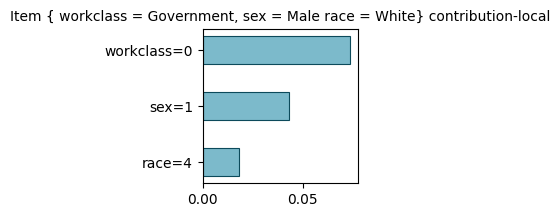

In [274]:
fp_details.plot_shapley_value(pattern = pattern, figsize=(2,2), title= "Item { workclass = Government, sex = Male race = White} contribution-local")

In [275]:
gsv = fp_details.global_shapley_value()
gsv

{frozenset({'hours-per-week=49'}): 0.007500894150552312,
 frozenset({'workclass=3'}): 0.004895566881992027,
 frozenset({'workclass=0'}): 0.005570484091563963,
 frozenset({'hours-per-week=44'}): 0.0036240091391079223,
 frozenset({'sex=1'}): 0.005677491781164746,
 frozenset({'race=4'}): 0.0025602449126258704,
 frozenset({'hours-per-week=39'}): -0.0013501491669524076,
 frozenset({'workclass=2'}): -0.0016053563926953372,
 frozenset({'sex=0'}): -0.0070875264799292815,
 frozenset({'workclass=4'}): -0.0024326182097947962,
 frozenset({'race=2'}): -0.006953359196869868}

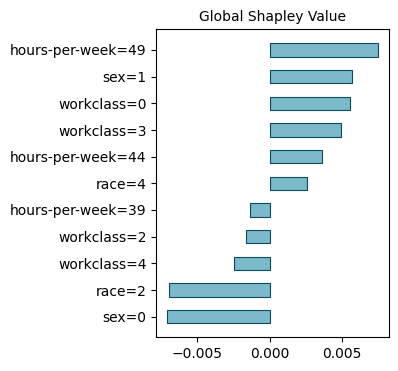

In [276]:
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value')

In [277]:
sex1 = get_original_label('sex', 1)
workclass0 = get_original_label('workclass', 0)
workclass3 = get_original_label('workclass', 3)
race4 = get_original_label('race', 4)
workclass2 = get_original_label('workclass', 2)
workclass4 = get_original_label('workclass', 4)
race2 = get_original_label('race', 2)

sex0 = get_original_label('sex', 0)
print(f"\n sex = 1 means: {sex1}, \n workclass = 0 means: {workclass0},  \n workclass = 3 means: {workclass3},   \n race = 4 means: {race4}, \n workclass = 2 means: {workclass2},    \n workclass = 4 means: {workclass4}, \n race = 2 means: {race2},     \n sex = 0 means: {sex0}  ")


 sex = 1 means: Male, 
 workclass = 0 means: Government,  
 workclass = 3 means: Self-emp,   
 race = 4 means: White, 
 workclass = 2 means: Private,    
 workclass = 4 means: Unknown, 
 race = 2 means: Black,     
 sex = 0 means: Female  
